<a href="https://colab.research.google.com/github/GabrielBatavia/Learn_TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural netwrok classification with Tensorflow

in this notebook we're going to learn how to write neural netwroks fo classification problems

A classification is where you try to classify something or another

A few type of classification problems :
* Binary classification
* Muliclass classification
* Multilable classification

## Creating data to voew and fit

In [26]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [27]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [28]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [29]:
# visualize for understand the data

import pandas as pd
circles = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


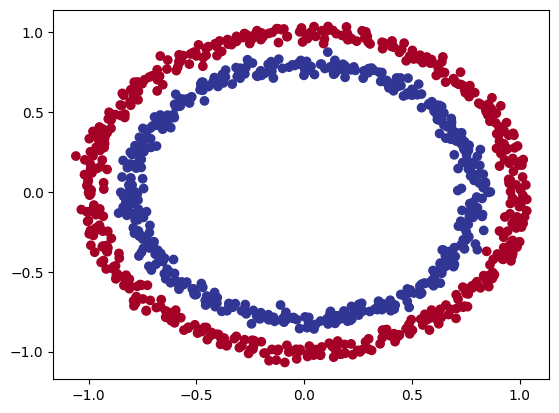

In [30]:
# visualize with plot

import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [31]:
# Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [32]:
# How many samples we're working
len(x), len(y)

(1000, 1000)

In [33]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

In [34]:
# import
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [35]:
#Build our traind and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
#check
len(x), len(x_train), len(x_test)

(1000, 800, 200)

In [37]:
x_train

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])

In [38]:
# Build the model
tf.random.set_seed(42)

# 1. Create the model
circle_model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(2)
])

# 2. Compile the model
circle_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics= ["accuracy"])

# 3. Fit the model
history_circle = circle_model.fit(x_train, y_train, epochs=50, verbose=0)

In [39]:
# evaluate model
y_pred_circle = circle_model.predict(x_test)
y_pred_circle[:10]

7/7 [==============================] - 0s 3ms/step


array([[ 0.13376442,  0.38992378],
       [ 0.51570445,  0.40938833],
       [-0.5474387 ,  0.35671556],
       [ 0.3254564 ,  0.39925945],
       [-0.03946393,  0.38499612],
       [ 0.18975711,  0.39665923],
       [ 0.8625934 ,  0.42905197],
       [ 0.78756195,  0.42614338],
       [-0.56784123,  0.35557252],
       [ 0.54692614,  0.41100594]], dtype=float32)

In [40]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [41]:
# Import
import matplotlib.pyplot as plt

Text(0.5, 0, 'epochs')

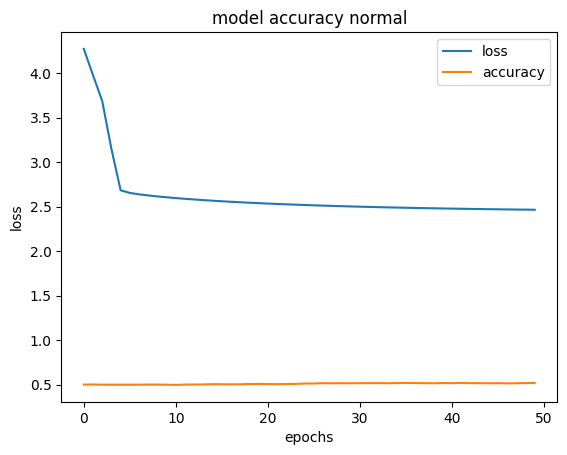

In [42]:
# Plot history (loss curve a or training curve)
pd.DataFrame(history_circle.history).plot()
plt.title("model accuracy normal")
plt.ylabel("loss")
plt.xlabel("epochs")

In [43]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Our model still like guessing and still do gambling, we should imrpove the accuracy.

We have trick to improve our model
1. Create a model
2. Compiling the model
3. Fitting a model

In [49]:
# Build the model again
tf.random.set_seed(42)

# 1. Create the model
circle_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation="softmax")
])

# compile the model
circle_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

# 3. Fit the model
history_circle_2 = circle_model_2.fit(x_train, y_train, epochs=50, verbose=0)

Text(0.5, 0, 'epochs')

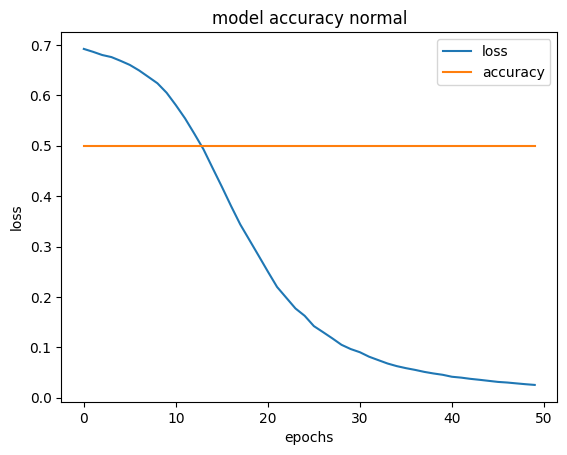

In [50]:
# Plot history (loss curve a or training curve)
pd.DataFrame(history_circle_2.history).plot()
plt.title("model accuracy normal")
plt.ylabel("loss")
plt.xlabel("epochs")

To visualize our model's predict, let's create a function 'plot_decision_boundary()', this function will:

- Take in a trained model, features (x) and labels (y)
- Create a meshgrid of the different x values
- Make predictions across the meshgrid
- Plot the prections as well a line between zones

In [46]:
import numpy as np
np.__version__

'1.25.2'

In [47]:
# Create visualize function for our model predict

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stcak 2d arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundry
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


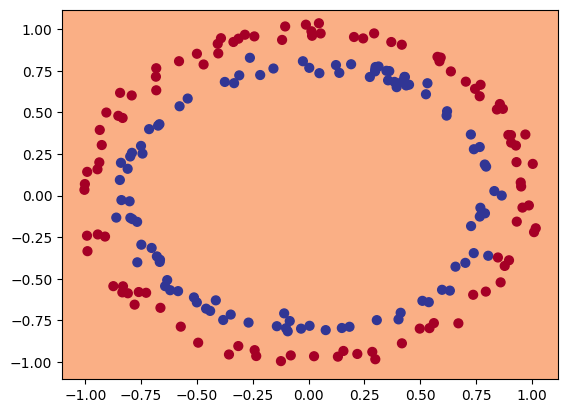

In [51]:
# Check out the predictions our model is making
plot_decision_boundary(circle_model_2, x_test, y_test)